<a href="https://colab.research.google.com/github/Anh-Quan-07/-n-T-p-Python/blob/main/%C4%91%E1%BB%93%20%C3%A1n%20k1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Nhập các thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Nhập tập dữ liệu
data = pd.read_csv( "https://raw.githubusercontent.com/Anh-Quan-07/-n-T-p-Python/main/d%E1%BB%AF%20li%E1%BB%87u%20(1)32131.csv",delimiter=',')
data.head()

,TV,radio,newspaper,sales,Unnamed: 4,Unnamed: 5
0,230.1,37.8,69.2,2210,NaN,NaN
1,44.5,39.3,45.1,1040,NaN,NaN
2,17.2,45.9,69.3,930,NaN,NaN
3,151.5,41.3,58.5,1850,NaN,NaN
4,180.8,10.8,58.4,1290,NaN,NaN


In [4]:
data = data.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)

In [5]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,1402.250000
std,85.854236,14.846809,21.778621,521.745657
min,0.700000,0.000000,0.300000,160.000000
25%,74.375000,9.975000,12.750000,1037.500000
50%,149.750000,22.900000,25.750000,1290.000000
75%,218.825000,36.525000,45.100000,1740.000000
max,296.400000,49.600000,114.000000,2700.000000


In [6]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [7]:
data.info

<bound method DataFrame.info of         TV  radio  newspaper  sales
0    230.1   37.8       69.2   2210
1     44.5   39.3       45.1   1040
2     17.2   45.9       69.3    930
3    151.5   41.3       58.5   1850
4    180.8   10.8       58.4   1290
..     ...    ...        ...    ...
195   38.2    3.7       13.8    760
196   94.2    4.9        8.1    970
197  177.0    9.3        6.4   1280
198  283.6   42.0       66.2   2550
199  232.1    8.6        8.7   1340

[200 rows x 4 columns]>

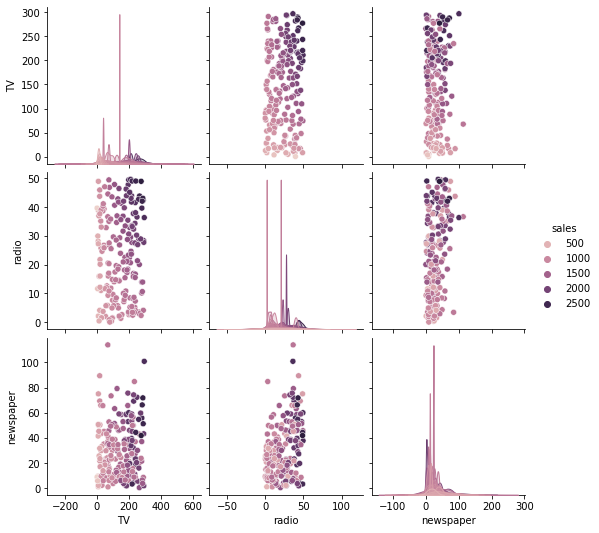

In [8]:
non_smoker_data = data[data["sales"] == "no"]
smoker_data = data[data["sales"] == "yes"]
sns.pairplot(data, hue="sales")
plt.show()

Hồi quy tuyến tính 


Ước tính doanh số bán hàng đối với quảng cáo trên Truyền hình.

In [9]:
#Khởi tạo các biến
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)



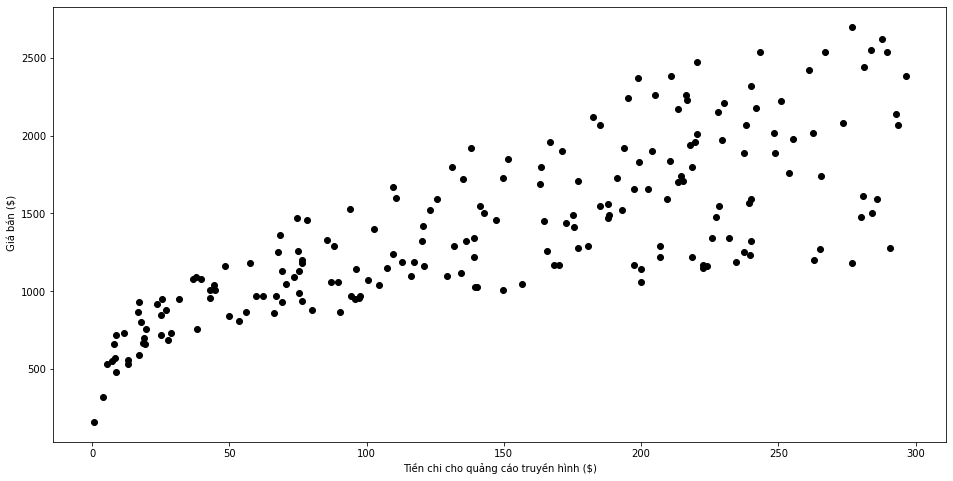

In [11]:
#Vẽ biểu đồ để xem các điểm
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.xlabel("Tiền chi cho quảng cáo truyền hình ($)")
plt.ylabel(" Giá bán ($)")
plt.show()



In [12]:
#Tách tập dữ liệu của chúng tôi thành tập dữ liệu Đào tạo và Kiểm tra
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
#Lắp hồi quy tuyến tính vào tập huấn luyện
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

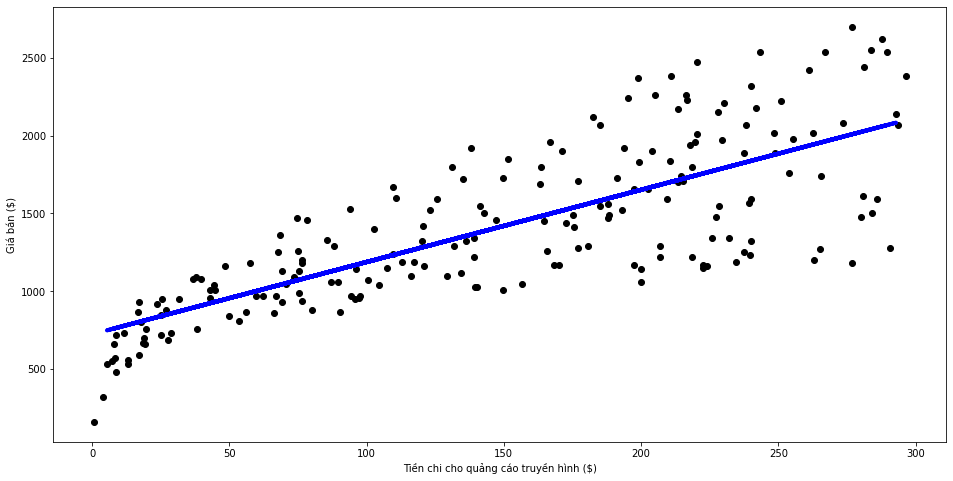

train score: 57.36021199591976 %
test score: 67.14477229302764 %


In [14]:
#dự đoán kết quả bộ Kiểm tra
from sklearn import linear_model
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))
lnregr = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = lnregr.predict(X_test)
plt.figure(figsize=(16, 8))
plt.scatter(X, y, c='black')
plt.plot(
    X_test,
    y_pred,
    c='blue',
    linewidth=4
)
plt.xlabel("Tiền chi cho quảng cáo truyền hình ($)")
plt.ylabel("Giá bán ($)")
plt.show()
print("train score:", 100*lnregr.score(X_train, y_train), "%")
print("test score:", 100*lnregr.score(X_test, y_test), "%")

In [15]:
y_pred = reg.predict(X_test)
rmse(y_test, y_pred)

299.5161304907236

In [16]:
#Tính toán hệ số
reg.coef_

array([[4.64078021]])

In [17]:
#Tính toán đánh chặn
reg.intercept_

array([723.94598308])

In [18]:
#Tính giá trị bình phương R
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6714477229302764

In [19]:
output = reg.predict([[230.1]])
output

array([[1791.78951004]])